# NHS Surgery Risk Predictor

> Add blockquote




*   This notebook comprises a deep neural network model using regression to predict the outputs based on the given input.
*   The dataset used for this model is taken from https://competitions.codalab.org/competitions/19365#learn_the_details-overview
*   The drive link for the downloaded dataset can be found here- https://drive.google.com/drive/folders/1wD4BePYuYLxdzPKvxICOoCl7iEJUZZhO?usp=sharing





### Import packages and read the main table used for training

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf


df = pd.read_table('/content/drive/MyDrive/NHS Calculator/public_data_1/public_data_1/mimic_synthetic_train.data.tsv', sep=" ")

df.drop(df.columns[0], axis = 1, inplace = True)

#print(df)
print(len(df))

79998


## Cleaning the dataset
### Get the label values, and print them along with the table

In [ ]:
column_names_df = pd.read_table('/content/drive/MyDrive/NHS Calculator/public_data_1/public_data_1/mimic_synthetic_feat.name.tsv', names=['1'])

column_headings = column_names_df['1'].tolist()

print(column_headings)

df.columns = column_headings

df

['SUBJECT_ID', 'HADM_ID', 'ADMITTIME', 'DISCHTIME', 'INSURANCE', 'LANGUAGE', 'RELIGION', 'MARITAL_STATUS', 'ETHNICITY', 'GENDER', 'AGE', 'HR_MIN_DAY1', 'HR_MAX_DAY1', 'HR_MEAN_DAY1', 'SYS_BP_MIN_DAY1', 'SYS_BP_MAX_DAY1', 'SYS_BP_MEAN_DAY1', 'DIAS_BP_MIN_DAY1', 'DIAS_BP_MAX_DAY1', 'DIAS_BP_MEAN_DAY1', 'MEAN_BP_MIN_DAY1', 'MEAN_BP_MAX_DAY1', 'MEAN_BP_MEAN_DAY1', 'RESP_RATE_MIN_DAY1', 'RESP_RATE_MAX_DAY1', 'RESP_RATE_MEAN_DAY1', 'TEMP_MIN_DAY1', 'TEMP_MAX_DAY1', 'TEMP_MEAN_DAY1', 'SPO2_MIN_DAY1', 'SPO2_MAX_DAY1', 'SPO2_MEAN_DAY1', 'GLUCOSE_MIN_DAY1', 'GLUCOSE_MAX_DAY1', 'GLUCOSE_MEAN_DAY1', 'HR_MIN_DAY2', 'HR_MAX_DAY2', 'HR_MEAN_DAY2', 'SYS_BP_MIN_DAY2', 'SYS_BP_MAX_DAY2', 'SYS_BP_MEAN_DAY2', 'DIAS_BP_MIN_DAY2', 'DIAS_BP_MAX_DAY2', 'DIAS_BP_MEAN_DAY2', 'MEAN_BP_MIN_DAY2', 'MEAN_BP_MAX_DAY2', 'MEAN_BP_MEAN_DAY2', 'RESP_RATE_MIN_DAY2', 'RESP_RATE_MAX_DAY2', 'RESP_RATE_MEAN_DAY2', 'TEMP_MIN_DAY2', 'TEMP_MAX_DAY2', 'TEMP_MEAN_DAY2', 'SPO2_MIN_DAY2', 'SPO2_MAX_DAY2', 'SPO2_MEAN_DAY2', 'GLUCOSE

,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,GENDER,...,Eyeinfectn,Othereyedx,Otitismedia,Dizziness,Othereardx,Othnervdx,Hrtvalvedx,Carditis,HTN,Htncomplicn
0,50520,186416,2134-03-17_03:59:00,2113-03-06_12:05:00,Private,ENGL,UNOBTAINABLE,SINGLE,WHITE,M,...,0,0,0,0,0,0.0,0,0,0,1
1,17956,126413,2164-04-05_17:32:00,2180-09-20_16:30:00,Medicaid,SPAN,CATHOLIC,WIDOWED,OTHER,M,...,0,0,0,0,0,0.0,0,0,0,0
2,90258,109355,2102-09-08_00:58:00,2166-06-26_15:30:00,Medicare,ENGL,NOT_SPECIFIED,MARRIED,WHITE,M,...,0,0,0,0,0,0.0,0,0,1,0
3,25159,123784,2163-08-06_12:07:00,2147-01-14_18:40:00,Medicare,ENGL,UNOBTAINABLE,MARRIED,UNKNOWN/NOT_SPECIFIED,F,...,0,0,0,0,0,0.0,0,0,0,0
4,11634,144424,2147-08-30_19:51:00,2136-11-19_18:53:00,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,F,...,0,0,0,0,0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79993,63788,148874,2196-08-05_16:06:00,2135-02-10_14:15:00,Medicare,ENGL,NOT_SPECIFIED,UNKNOWN_(DEFAULT),WHITE,F,...,0,0,0,0,0,0.0,0,0,1,0
79994,22326,119010,2167-10-06_18:35:00,2121-01-01_16:04:00,Medicaid,ENGL,JEWISH,MARRIED,WHITE,F,...,0,0,0,0,0,1.0,0,0,0,0
79995,81274,183388,2143-04-04_10:30:00,2141-08-09_13:30:00,Private,ENGL,NOT_SPECIFIED,SEPARATED,WHITE,F,...,0,0,0,0,0,0.0,0,0,0,0
79996,16587,151289,2183-12-03_02:50:00,2101-08-05_16:00:00,Government,ENGL,CATHOLIC,MARRIED,BLACK/AFRICAN_AMERICAN,M,...,0,0,0,0,0,0.0,0,0,1,0


### removing the first 10 columns and the 'ICU' that are unnecessary while training the model.

In [ ]:
#drop columns to keep only essential columns
df2 = df.drop(df.columns[0:9], axis = 1)

df2 = df2.drop(df2.columns[50], axis = 1)

print(df2)
#print(df2)
#df.drop(df.columns[62], axis = 1, inplace = True)
#use the cleaned dataframe for the model
#code a regression model from daniel bourke's tutorial

df2 = df2[["GENDER","AGE", "HR_MIN_DAY1", "HR_MAX_DAY1", "SYS_BP_MIN_DAY1", "SYS_BP_MAX_DAY1", "Htncomplicn","Thyroidcncr"]]

df2


### Dropping further variables and loading the training data table solutions

*   removed all rows with empty values and converting multiple choice inputs to binary inputs like gender.
*   loading the training solutions and counting the number of 1s and 0s.



In [ ]:

#print(len(train_solution))

#df2['DIED'] = train_solution.pop(0)

train = df2.dropna()


train_features = train.copy()

gender = {'M': 1,'F': 0}

train_features.GENDER = [gender[item] for item in train_features.GENDER]

train_features = np.asarray(train_features).astype('float64')
print(train_features.shape)

train_solution = pd.read_csv('/content/drive/MyDrive/NHS Calculator/public_data_1/public_data_1/mimic_synthetic_train.solution.csv')

print(train_solution)

train_labels = train_solution

train_labels = train_labels.astype('float64')

neg, pos = np.bincount(train_solution.to_numpy().flatten())

total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

### Loading the validation/testing dataset and repeating the data table cleaning processes

In [ ]:
from tensorflow.python.framework.ops import TensorType
test_df = pd.read_table('/content/drive/MyDrive/NHS Calculator/public_data_1/public_data_1/mimic_synthetic_test.data.tsv', sep = " ")

#print(test_df.shape)
test_df.drop(test_df.columns[0], axis = 1, inplace = True)

test_df.columns = column_headings

#test_df = test_df.drop(df.columns[0:9], axis = 1)

#test_df = test_df.drop(test_df.columns[50], axis = 1)



test_features = test_df.copy()

gender = {'M': 1,'F': 0}

test_features.GENDER = [gender[item] for item in test_features.GENDER]

test_features = test_features[["GENDER","AGE", "HR_MIN_DAY1", "HR_MAX_DAY1", "SYS_BP_MIN_DAY1", "SYS_BP_MAX_DAY1", "Htncomplicn","Thyroidcncr"]]

test_features

,GENDER,AGE,HR_MIN_DAY1,HR_MAX_DAY1,SYS_BP_MIN_DAY1,SYS_BP_MAX_DAY1,Htncomplicn,Thyroidcncr
0,0,56,66.609850,106.798430,92.358284,141.439130,0,0
1,1,32,69.716510,102.693770,88.278740,176.566400,0,0
2,1,80,63.280200,85.746860,89.397710,142.621150,0,0
3,1,83,75.228610,104.363260,72.468110,138.866460,0,0
4,1,73,54.878765,77.448685,107.238620,136.937410,0,0
...,...,...,...,...,...,...,...,...
19995,1,85,51.543890,72.393510,110.258730,142.554020,0,0
19996,1,69,61.791454,75.328030,67.106620,163.581270,0,0
19997,1,84,94.342350,132.678130,103.092735,130.994260,0,0
19998,1,84,48.682470,85.933426,96.184820,117.696530,0,0


In [ ]:
test_features.describe()


,GENDER,AGE,HR_MIN_DAY1,HR_MAX_DAY1,SYS_BP_MIN_DAY1,SYS_BP_MAX_DAY1,Htncomplicn,Thyroidcncr
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.0
mean,0.578000,62.676050,71.752807,103.277281,94.537604,147.846463,0.073550,0.0
std,0.493891,18.305979,14.640664,18.692941,16.935371,21.541014,0.261044,0.0
min,0.000000,16.000000,21.972717,50.403030,28.088125,94.797480,0.000000,0.0
25%,0.000000,51.000000,61.515122,89.952265,82.720151,131.961692,0.000000,0.0
50%,1.000000,66.000000,71.098133,101.785963,94.088165,145.446625,0.000000,0.0
75%,1.000000,77.000000,81.293922,115.031522,105.892530,161.428407,0.000000,0.0
max,1.000000,90.000000,132.205170,180.468980,164.407970,247.856430,1.000000,0.0


In [ ]:
test_solution = pd.read_csv('/content/drive/MyDrive/NHS Calculator/starting_kit_1/mimic_synthetic_test.csv')

test_labels = test_solution

test_labels = test_labels.astype('float64')



In [ ]:
test_labels

,0
0,0.0
1,0.0
2,0.0
3,1.0
4,1.0
...,...
19995,1.0
19996,1.0
19997,0.0
19998,0.0


In [ ]:
#test_features.head()
train_features.shape

train_labels

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
79993,0.0
79994,0.0
79995,0.0
79996,0.0


### Oversampling the dataset
*   The original training dataset is biased towards alive patient outputs (0s).

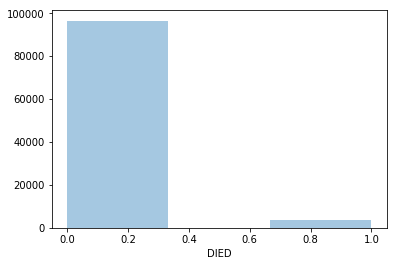
*   Thus I have used SMOTE to overrepresent the 1s to get rid of the bias and assist in training the model appropriately.


In [ ]:
from imblearn.over_sampling._smote.base import SMOTENC
# check version number
from imblearn.over_sampling import SMOTE
from collections import Counter

oversample = SMOTE()
train_features, train_labels = oversample.fit_resample(train_features, train_labels)



In [ ]:
counter = Counter(train_labels["0"])
print(counter)

Counter({0.0: 77201, 1.0: 77201})


## DNN Model
Adding a normalization layer



In [ ]:
normalizer = tf.keras.layers.Normalization(axis=None)

### Layers of the model


*   The model comprises 6 layers.
*   One normalization layer, 4 layers of relu, and 1 layer of sigmoid in the end

*   The loss is measured using mean squared error



In [ ]:
#creating a model

def build_and_compile_model(norm):
  model = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(8, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(loss='mse',
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["acc"])
  return model

### Load an already trained model

*   The path can be replaced accordingly.
*   Don't run this cell if trying to train a new model.



In [ ]:
dnn_model = tf.keras.models.load_model('/content/drive/MyDrive/NHS Calculator/models/mortality_prediction_model_epoch_100.h5')

### Testing the model on a sample inputs to understand the internal computation and verify the functioning


*   This is to test an already trained model and not a new model



In [ ]:
x1 = dnn_model.layers[0].call([73.0, 1.0, 54.878765, 77.448685, 107.23862, 136.93741, 0.0, 0.0])
print(x1)
x2 = dnn_model.layers[1].call(x1)
print(x2)
x3 = dnn_model.layers[2].call(x2)
print(x3)
x4 = dnn_model.layers[3].call(x3)
print(x4)
x5 = dnn_model.layers[4].call(x4)
print(x5)
print(dnn_model.layers[5].weights)
x6 = dnn_model.layers[5].call(x5)
print(x6)

In [ ]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.build(input_shape = (None, 8))
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 8)                3         
 n)                                                              
                                                                 
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                        



*   Training the model for certain amount of epochs





In [ ]:
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=2, epochs=480
    # class_weight=class_weight
)

#plot_loss(history)

### Plotting the performance of the model overall

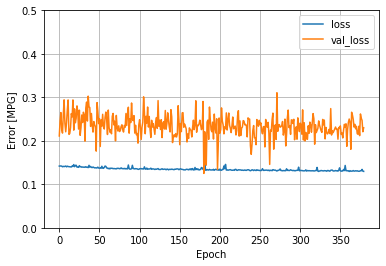

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 0.5])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)

In [ ]:
h5_dir = '/content/drive/MyDrive/NHS Calculator/models/'
h5_name = 'mortality_prediction_model_epoch_480.h5'
dnn_model.save(h5_dir+h5_name)

In [ ]:
test_features.iloc[0]

GENDER               0.000000
AGE                 56.000000
HR_MIN_DAY1         66.609850
HR_MAX_DAY1        106.798430
SYS_BP_MIN_DAY1     92.358284
SYS_BP_MAX_DAY1    141.439130
Htncomplicn          0.000000
Thyroidcncr          0.000000
Name: 0, dtype: float64

In [ ]:
y_pred = dnn_model.predict(tf.convert_to_tensor(test_features))
y_pred[0]

array([0.17933904], dtype=float32)

In [ ]:
x1 = dnn_model.layers[0].call(tf.convert_to_tensor(test_features.iloc[0]))
print(x1)
x2 = dnn_model.layers[1].call(x1)
print(x2)
x3 = dnn_model.layers[2].call(x2)
print(x3)
x4 = dnn_model.layers[3].call(x3)
print(x4)
x5 = dnn_model.layers[4].call(x4)
print(x5)
print(dnn_model.layers[5].weights)
x6 = dnn_model.layers[5].call(x5)
print(x6)

tf.Tensor(
[[  0.        56.        66.60985  106.79843   92.358284 141.43913
    0.         0.      ]], shape=(1, 8), dtype=float32)
tf.Tensor(
[[ 0.         8.852819   0.         0.         0.         1.1799273
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         1.4719555  0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
  18.73678    0.         0.         0.         0.         4.8589134
   0.         0.         0.        16.220814   0.         0.
   0.         0.         0.         0.       ]], shape=(1, 64), dtype=float32)
tf.Tensor(
[[0.         0.         0.         0.         0.         0.
  9.140127   0.         0.         0.         0.         0.
  0.         6.57616 

In [ ]:
y_pred = np.round(y_pred)


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels, y_pred)

array([[9076,  992],
       [8949,  983]])

In [ ]:
print(test_labels.shape)